# Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/deshm/Desktop/dataml/AAPL.csv')
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [5]:

df1=df.reset_index()['close']

In [6]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

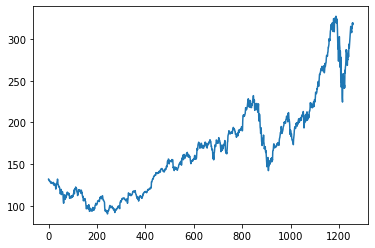

In [7]:

import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:

print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:

training_size,test_size

(817, 441)

In [17]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:

print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 315ms/step - loss: 0.0189 - val_loss: 0.0619
Epoch 2/100
12/12 [==============================] - 2s 166ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 3s 245ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 4/100
12/12 [==============================] - 2s 176ms/step - loss: 8.5105e-04 - val_loss: 0.0038
Epoch 5/100
12/12 [==============================] - 3s 220ms/step - loss: 6.8329e-04 - val_loss: 0.0056
Epoch 6/100
12/12 [==============================] - 2s 154ms/step - loss: 6.2388e-04 - val_loss: 0.0056
Epoch 7/100
12/12 [==============================] - 2s 171ms/step - loss: 6.5989e-04 - val_loss: 0.0047
Epoch 8/100
12/12 [==============================] - 2s 163ms/step - loss: 5.9936e-04 - val_loss: 0.0036
Epoch 9/100
12/12 [==============================] - 2s 197ms/step - loss: 6.0342e-04 - val_loss: 0.0036
Epoch 10/100
12/12 [==============================] - 2s 170ms/step

12/12 [==============================] - 2s 178ms/step - loss: 2.3416e-04 - val_loss: 0.0011
Epoch 79/100
12/12 [==============================] - 2s 192ms/step - loss: 2.3493e-04 - val_loss: 0.0015
Epoch 80/100
12/12 [==============================] - 2s 206ms/step - loss: 2.5084e-04 - val_loss: 0.0020
Epoch 81/100
12/12 [==============================] - 2s 155ms/step - loss: 2.2971e-04 - val_loss: 0.0011
Epoch 82/100
12/12 [==============================] - 2s 159ms/step - loss: 2.2926e-04 - val_loss: 0.0011
Epoch 83/100
12/12 [==============================] - 2s 175ms/step - loss: 2.1897e-04 - val_loss: 0.0015
Epoch 84/100
12/12 [==============================] - 2s 153ms/step - loss: 2.2393e-04 - val_loss: 0.0011
Epoch 85/100
12/12 [==============================] - 2s 154ms/step - loss: 2.1087e-04 - val_loss: 0.0012
Epoch 86/100
12/12 [==============================] - 2s 196ms/step - loss: 2.8118e-04 - val_loss: 0.0024
Epoch 87/100
12/12 [==============================] - 2s 15

In [27]:

import tensorflow as tf

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.81395662885845

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


238.7879035341921

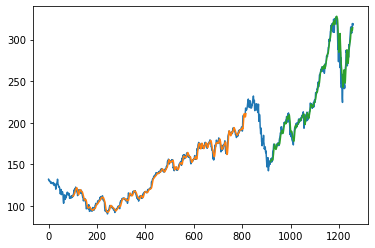

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()